# <center>Multi - Logistic Regression for prediction of wine quality<center>

#### ANGEL LAL

###### OBJECTIVE: Apply multi classification algorithm to a problem related to the Business Analytics or Finance domains. 

### DATA DESCRIPTION

The dataset is related to red vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("D:/MSTAT/SEM 3/Machine Learning/ML LAB/winequality-red.csv")
data1 = pd.read_csv("D:/MSTAT/SEM 3/Machine Learning/ML LAB/winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

The data consist of 1599 instances and 12 variables

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
print(list(data.columns))

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


### Variables
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data):
- 12 - quality (score between 0 and 10)



### EDA

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

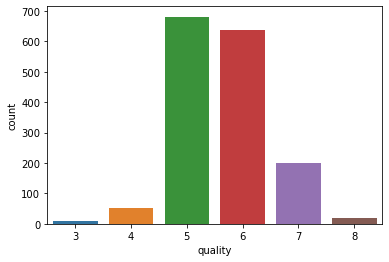

In [9]:
sns.countplot(x='quality',data=data)
plt.show()


In [10]:
count_3 = len(data[data['quality']==3])
count_4 = len(data[data['quality']==4])
count_5 = len(data[data['quality']==5])
count_6 = len(data[data['quality']==6])
count_7 = len(data[data['quality']==7])
count_8 = len(data[data['quality']==8])
pct_of_quality3 = count_3/(count_3+count_4+count_5+count_6+count_7+count_8)
print("percentage of quality 3 is", pct_of_quality3*100)
pct_of_quality4 = count_4/(count_3+count_4+count_5+count_6+count_7+count_8)
print("percentage of quality 4 is", pct_of_quality4*100)
pct_of_quality5 = count_5/(count_3+count_4+count_5+count_6+count_7+count_8)
print("percentage of quality 5 is", pct_of_quality5*100)
pct_of_quality6 = count_6/(count_3+count_4+count_5+count_6+count_7+count_8)
print("percentage of quality 6 is", pct_of_quality6*100)
pct_of_quality7 = count_7/(count_3+count_4+count_5+count_6+count_7+count_8)
print("percentage of quality 7 is", pct_of_quality7*100)
pct_of_quality8 = count_8/(count_3+count_4+count_5+count_6+count_7+count_8)
print("percentage of quality 8 is", pct_of_quality8*100)

percentage of quality 3 is 0.6253908692933083
percentage of quality 4 is 3.314571607254534
percentage of quality 5 is 42.589118198874296
percentage of quality 6 is 39.89993746091307
percentage of quality 7 is 12.445278298936834
percentage of quality 8 is 1.125703564727955


From the countplot and percentage of the classes we can observe a shift towards 5th and 6th classes. Hence the problem of imbalanced classification arrives

In [11]:
data.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


<Figure size 1440x648 with 0 Axes>

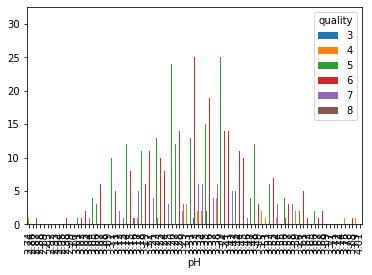

In [12]:
fig = plt.figure(figsize =(20, 9))

pd.crosstab(data.pH,data.quality).plot(kind='bar')
plt.xlabel = 'PH'
plt.ylabel = 'quality'
plt.show()

In [13]:
cat = pd.cut(data.alcohol,bins = [8.400000,10.200000,14.900000],
             labels = ['<=median','>median'])
data.insert(11,'alcohol_category',cat)

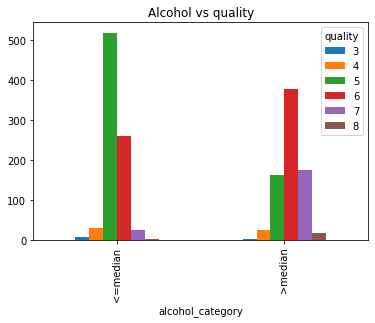

In [14]:
pd.crosstab(data.alcohol_category,data.quality).plot(kind='bar')
plt.title("Alcohol vs quality")

plt.show()

In [15]:
cat1 = pd.cut(data.density,bins = [0.990070,0.996750,1.003690],
             labels = ['<=median','>median'])
data.insert(8,'density_category',cat1)

Text(0.5, 1.0, 'Stacked Bar Chart of density vs quality')

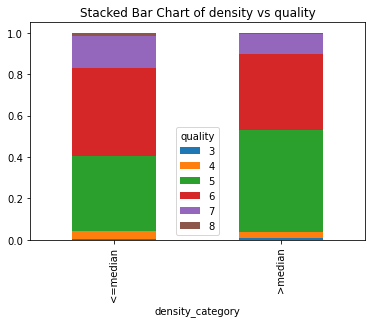

In [18]:
table=pd.crosstab(data.density_category,data.quality)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of density vs quality')
#plt.xlabel('density')
#plt.ylabel('Proportion of quality')

In [19]:
cat2 = pd.cut(data.chlorides,bins = [0.012000,0.079000,0.611000],
             labels = ['<=median','>median'])
data.insert(8,'chlorides_category',cat2)

Text(0.5, 1.0, 'Chlorides vs quality')

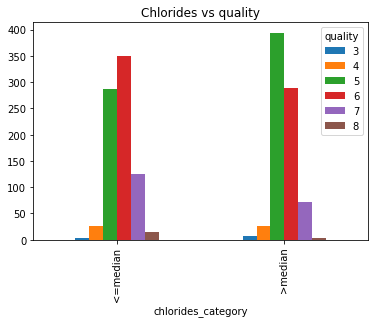

In [21]:
pd.crosstab(data.chlorides_category,data.quality).plot(kind='bar')
plt.title('Chlorides vs quality')
#plt.xlabel('chlorides')
#plt.ylabel('Frequency of quality')


### Synthentic Minority Oversampling Technique (SMOTE)

In [22]:
X = data1.loc[:, data1.columns != 'quality']
y = data1.loc[:, data1.columns == 'quality']

In [23]:

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['quality'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of quality 3 in oversampled data",len(os_data_y[os_data_y['quality']==3]))
print("Number of quality 4 in oversampled data",len(os_data_y[os_data_y['quality']==4]))
print("Number of quality 5 in oversampled data",len(os_data_y[os_data_y['quality']==5]))
print("Number of quality 6 in oversampled data",len(os_data_y[os_data_y['quality']==6]))
print("Number of quality 7 in oversampled data",len(os_data_y[os_data_y['quality']==7]))
print("Number of quality 8 in oversampled data",len(os_data_y[os_data_y['quality']==8]))
print("Proportion of quality 3 in oversampled data is ",len(os_data_y[os_data_y['quality']==3])/len(os_data_X))
print("Proportion of quality 4 in oversampled data is ",len(os_data_y[os_data_y['quality']==4])/len(os_data_X))
print("Proportion of quality 5 in oversampled data is ",len(os_data_y[os_data_y['quality']==5])/len(os_data_X))
print("Proportion of quality 6 in oversampled data is ",len(os_data_y[os_data_y['quality']==6])/len(os_data_X))
print("Proportion of quality 7 in oversampled data is ",len(os_data_y[os_data_y['quality']==7])/len(os_data_X))
print("Proportion of quality 8 in oversampled data is ",len(os_data_y[os_data_y['quality']==8])/len(os_data_X))

length of oversampled data is  2838
Number of quality 3 in oversampled data 473
Number of quality 4 in oversampled data 473
Number of quality 5 in oversampled data 473
Number of quality 6 in oversampled data 473
Number of quality 7 in oversampled data 473
Number of quality 8 in oversampled data 473
Proportion of quality 3 in oversampled data is  0.16666666666666666
Proportion of quality 4 in oversampled data is  0.16666666666666666
Proportion of quality 5 in oversampled data is  0.16666666666666666
Proportion of quality 6 in oversampled data is  0.16666666666666666
Proportion of quality 7 in oversampled data is  0.16666666666666666
Proportion of quality 8 in oversampled data is  0.16666666666666666


Inorder to avoid the imbalanced classification problem, SMOTE is applied to the test data set. Now all the classes have equal number of instances.

### Implementing Logistic Regression


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression(multi_class = 'multinomial')
logreg.fit(X_train, y_train)

C:\Users\angel\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\angel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

Multi - logistic regression is applied to the data set in order to predict the quality of wine based on the variables such as acidity, chlorides, pH etc.

### Prediction and calculating the accuracy measures

In [25]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))#score() gives classification accuracy measure

Accuracy of logistic regression classifier on test set: 0.62


In [26]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  0   0   2   0   0   0]
 [  0   0   7   4   0   0]
 [  0   0 101  33   1   0]
 [  0   0  42  96   4   0]
 [  0   0   2  22   3   0]
 [  0   0   0   2   1   0]]


Confusion matrix explains the TP,TN,FP and FN and inturns helps in finding precision and recall. 
- In terms of class 3, confusion matrix explains 0+318 correct predictions and 2 wrong predictions
- In terms of class4, confusion matrix explains 0+307 correct predictions and 11 wrong predictions and so on

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.75      0.70       135
           6       0.61      0.68      0.64       142
           7       0.33      0.11      0.17        27
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.27      0.26      0.25       320
weighted avg       0.58      0.62      0.59       320



C:\Users\angel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\angel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\angel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


All the summary measures are found out for the logistic regression model. The model can predict the quality of wine 63% accurately. Since we used oversampling, we go for weighted avg measure. The model provides 58% precision and 63% recall.

### Conclusion

The business problem considered was to predict the wine quality based on many variables such as acidity, pH, chlorides, density etc. Based on these variables the wine was categorised into 6 different categories (class 3,4,5,6,7 and 8). 

From the countplot classes 5  and 6 were identified as majority classes and to avoid the problem of imbalances, SMOTE was applied. and then multi logistic regression was applied to the data.

- The accuracy of the multi logistic regression classifier was found out to be 0.63. i.e, the model can predict the quality of wine 63% acccurately. 
- In terms of class 3, confusion matrix explains 0+318 correct predictions and 2 wrong predictions
- In terms of class4, confusion matrix explains 0+307 correct predictions and 11 wrong predictions and so on
- Classes 5 & 6 provides maximum precision which is 0.67 and 0.61 respectively.
- The overal model provides 58% precision and 63% recall.
